In [9]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

In [10]:
path: str = './data/'
while os.path.basename(os.getcwd()) != 'topic04_02':
    os.chdir('..')
    print(os.getcwd())
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))
droplist = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
col = prokaryotes.columns
dropl2 = []
""" for n in col:
    if len(n) == 2:
        dropl2.append(n) """
prokaryotes = prokaryotes.drop(prokaryotes.columns[droplist], axis=1)
prokaryotes = prokaryotes.drop(dropl2, axis=1)
prokaryotes = prokaryotes.drop(['helixind','helixseq'],axis = 1)
prokaryotes['saltperaa'] = prokaryotes['A_Salty'] / prokaryotes['Length']
prokaryotes = prokaryotes.reset_index(drop=True)

C:\Users\tobia\AppData\Local\Temp\ipykernel_4656\699483961.py:5: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))


In [11]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA

In [12]:
prokaryotes.replace([np.inf, -np.inf], np.nan, inplace=True)
prokaryotes = prokaryotes.fillna(0)

In [13]:
scaled_prokaryotes = StandardScaler().fit_transform(prokaryotes)

In [14]:
PCA_prokaryotes = PCA().fit(scaled_prokaryotes)

In [15]:
eigenvalues = PCA_prokaryotes.explained_variance_ 
prokaryotes_PCA = PCA(n_components=np.sum(eigenvalues > 0.7)).fit_transform(scaled_prokaryotes)

In [16]:
prokaryotes_PCA_df = pd.DataFrame(data = prokaryotes_PCA, columns = [f'PC{i+1}' for i in range(np.sum(eigenvalues > 0.7))])

In [17]:
variance = PCA_prokaryotes.explained_variance_ratio_


In [18]:
prokaryotesmp =  pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))

C:\Users\tobia\AppData\Local\Temp\ipykernel_4656\3362361442.py:1: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotesmp =  pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))


In [19]:
""" low_threshold = prokaryotesmp['meltPoint'].quantile(0.33)
high_threshold = prokaryotesmp['meltPoint'].quantile(0.67)
for n in prokaryotesmp.index:
    if prokaryotesmp.loc[n,'meltPoint'] <= low_threshold:
        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'low_Tm'
    elif prokaryotesmp.loc[n,'meltPoint'] >= high_threshold:
        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'high_Tm'
    else:
        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'mid_Tm' """

" low_threshold = prokaryotesmp['meltPoint'].quantile(0.33)\nhigh_threshold = prokaryotesmp['meltPoint'].quantile(0.67)\nfor n in prokaryotesmp.index:\n    if prokaryotesmp.loc[n,'meltPoint'] <= low_threshold:\n        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'low_Tm'\n    elif prokaryotesmp.loc[n,'meltPoint'] >= high_threshold:\n        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'high_Tm'\n    else:\n        prokaryotes_PCA_df.loc[n, 'meltPoint1'] = 'mid_Tm' "

In [20]:
for n in prokaryotesmp.index:
    if prokaryotesmp.loc[n,'meltPoint'] <= prokaryotesmp['meltPoint'].quantile(0.1):
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'low_Tm'
    elif prokaryotesmp.loc[n,'meltPoint'] >= prokaryotesmp['meltPoint'].quantile(0.45) and prokaryotesmp.loc[n,'meltPoint'] <= prokaryotesmp['meltPoint'].quantile(0.55):
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'mid_Tm'
    elif prokaryotesmp.loc[n,'meltPoint'] >= prokaryotesmp['meltPoint'].quantile(0.90):
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'high_Tm'
    else:
        prokaryotes_PCA_df.loc[n, 'meltPoint2'] = np.nan

C:\Users\tobia\AppData\Local\Temp\ipykernel_4656\768394939.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'mid_Tm' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  prokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'mid_Tm'


In [21]:
loadings = PCA(n_components=20).fit(scaled_prokaryotes).components_.T
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=prokaryotes.columns)

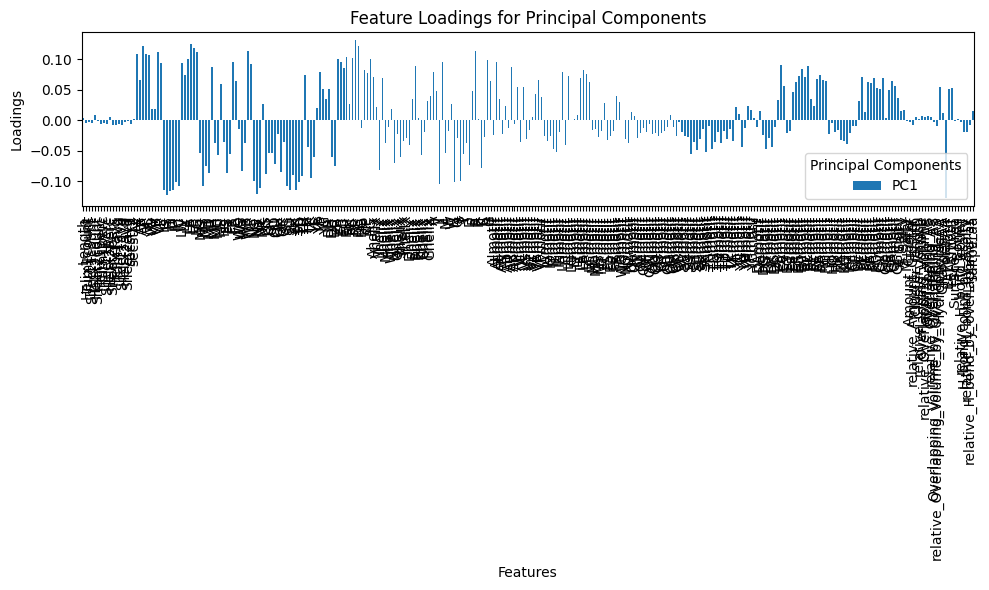

In [22]:
plt.figure(figsize=(10, 6))
loadings_df['PC1'].plot(kind='bar', figsize=(10, 6))
plt.title('Feature Loadings for Principal Components')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
plt.legend(title='Principal Components')
plt.tight_layout()
plt.show()

In [23]:
loadings_df['PC1'][loadings_df['PC1'] < -0.09]

IQ        -0.114104
IS        -0.122414
IT        -0.115992
ID        -0.114799
IH        -0.101559
IC        -0.108132
MS        -0.107734
NQ        -0.098962
NS        -0.120223
NT        -0.110861
ST        -0.107859
SD        -0.114475
SH        -0.090252
SK        -0.114189
SC        -0.100489
TD        -0.090945
TK        -0.094785
I         -0.104770
N         -0.101407
S         -0.099415
PolarAA   -0.127632
Name: PC1, dtype: float64

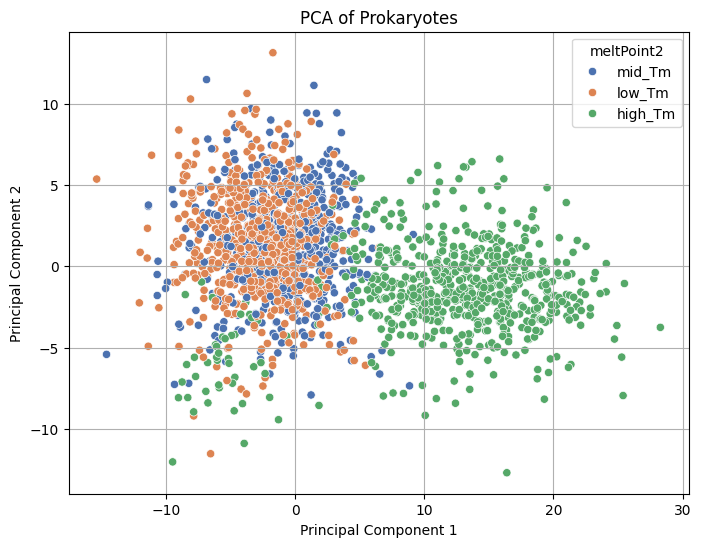

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = prokaryotes_PCA_df[prokaryotes_PCA_df['meltPoint2'].isin(['high_Tm','mid_Tm','low_Tm'])], x = 'PC1', y = 'PC2', hue = 'meltPoint2',palette = 'deep')
#sns.scatterplot(data = prokaryotes_PCA_df, x = 'PC1', y = 'PC3', hue = 'meltPoint',palette = 'deep')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Prokaryotes')
plt.grid()
plt.show()

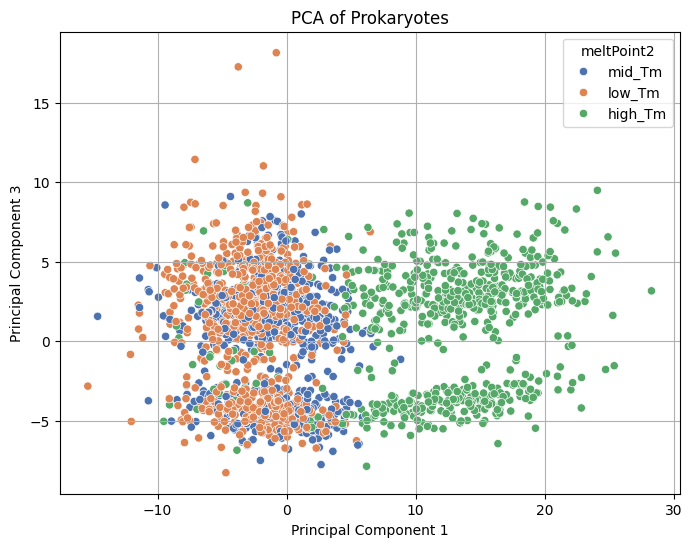

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = prokaryotes_PCA_df[prokaryotes_PCA_df['meltPoint2'].isin(['high_Tm','mid_Tm','low_Tm'])], x = 'PC1', y = 'PC3', hue = 'meltPoint2',palette = 'deep')
#sns.scatterplot(data = prokaryotes_PCA_df, x = 'PC1', y = 'PC3', hue = 'meltPoint',palette = 'deep')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA of Prokaryotes')
plt.grid()
plt.show()

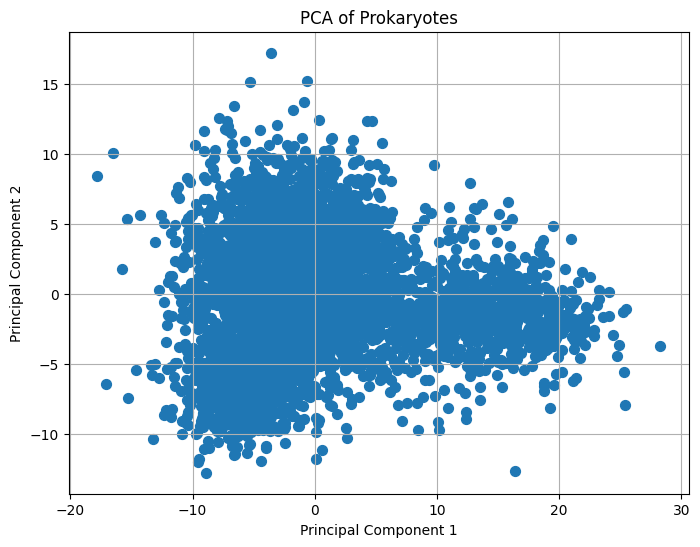

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(prokaryotes_PCA_df['PC1'], prokaryotes_PCA_df['PC2'], s = 50, )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Prokaryotes')
plt.grid()
plt.show()

Sparse PCA

In [27]:
'''sPCA_prokaryotes = SparsePCA().fit(scaled_prokaryotes)
seigenvalues = sPCA_prokaryotes.explained_variance_ 
sprokaryotes_sPCA = SparsePCA(n_components=np.sum(seigenvalues > 0.7)).fit_transform(scaled_prokaryotes)
sprokaryotes_sPCA_df = pd.DataFrame(data = sprokaryotes_sPCA, columns = [f'PC{i+1}' for i in range(np.sum(seigenvalues > 0.7))])
svariance = sPCA_prokaryotes.explained_variance_ratio_'''

"sPCA_prokaryotes = SparsePCA().fit(scaled_prokaryotes)\nseigenvalues = sPCA_prokaryotes.explained_variance_ \nsprokaryotes_sPCA = SparsePCA(n_components=np.sum(seigenvalues > 0.7)).fit_transform(scaled_prokaryotes)\nsprokaryotes_sPCA_df = pd.DataFrame(data = sprokaryotes_sPCA, columns = [f'PC{i+1}' for i in range(np.sum(seigenvalues > 0.7))])\nsvariance = sPCA_prokaryotes.explained_variance_ratio_"

In [28]:
sum(variance[0:10])

0.43968700917167786

PCA with only top 30% and bottom 30% of meltpoints

In [29]:
def pain(data, by= None, lower = 0.1, upper = 0.9):
    """
    data: pandas DataFrame or Series, if series then no argument by \n
    by: column to filter by (string) (only applicable if data is a DataFrame) \n
    upper and lower: threshold percentages, for example lower = 0.1, upper = 0.9"""
    import pandas as pd
    if isinstance(data, pd.DataFrame):
        lower_threshold = data[by].quantile(lower)
        upper_threshold = data[by].quantile(upper)
        return data[(data[by] <= lower_threshold) | (data[by] >= upper_threshold)].reset_index(drop=True)
    if isinstance(data, pd.Series):
        lower_threshold = data.quantile(lower)
        upper_threshold = data.quantile(upper)
        return data[(data <= lower_threshold) | (data >= upper_threshold)].reset_index(drop=True)
    else:
        raise ValueError('Invalid data input')

In [30]:
prokaryotes2: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))
prokaryotesquant = pain(prokaryotes2,'meltPoint',0.2,0.8)
qprokaryotesmp = prokaryotesquant.copy()
droplist = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
col = prokaryotesquant.columns
dropl2 = []
""" for n in col:
    if len(n) == 2:
        dropl2.append(n) """
prokaryotesquant = prokaryotesquant.drop(prokaryotes2.columns[droplist], axis=1)
#prokaryotes = prokaryotes.drop(dropl2, axis=1)
prokaryotesquant = prokaryotesquant.drop(['helixind','helixseq'],axis = 1)
prokaryotesquant = prokaryotesquant.reset_index(drop=True)

C:\Users\tobia\AppData\Local\Temp\ipykernel_4656\2957465745.py:1: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  prokaryotes2: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))


In [31]:
prokaryotesquant.replace([np.inf, -np.inf], np.nan, inplace=True)
prokaryotesquant = prokaryotesquant.fillna(0)
scaled_qprokaryotes = StandardScaler().fit_transform(prokaryotesquant)
qPCA_prokaryotes = PCA().fit(scaled_qprokaryotes)
qeigenvalues = qPCA_prokaryotes.explained_variance_ 
qprokaryotes_PCA = PCA(n_components=np.sum(qeigenvalues > 0.7)).fit_transform(scaled_qprokaryotes)
qprokaryotes_PCA_df = pd.DataFrame(data = qprokaryotes_PCA, columns = [f'PC{i+1}' for i in range(np.sum(qeigenvalues > 0.7))])
qvariance = qPCA_prokaryotes.explained_variance_ratio_
qloadings = PCA(n_components=20).fit(scaled_qprokaryotes).components_.T
qloadings_df = pd.DataFrame(qloadings, columns=[f'PC{i+1}' for i in range(qloadings.shape[1])], index=prokaryotesquant.columns)

In [32]:
for n in qprokaryotesmp.index:
    if qprokaryotesmp.loc[n,'meltPoint'] <= qprokaryotesmp['meltPoint'].quantile(0.1):
        qprokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'low_Tm'
    elif qprokaryotesmp.loc[n,'meltPoint'] >= qprokaryotesmp['meltPoint'].quantile(0.45) and qprokaryotesmp.loc[n,'meltPoint'] <= qprokaryotesmp['meltPoint'].quantile(0.55):
        qprokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'mid_Tm'
    elif qprokaryotesmp.loc[n,'meltPoint'] >= qprokaryotesmp['meltPoint'].quantile(0.9):
        qprokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'high_Tm'
    else:
        qprokaryotes_PCA_df.loc[n, 'meltPoint2'] = np.nan

C:\Users\tobia\AppData\Local\Temp\ipykernel_4656\3518356350.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'mid_Tm' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  qprokaryotes_PCA_df.loc[n, 'meltPoint2'] = 'mid_Tm'


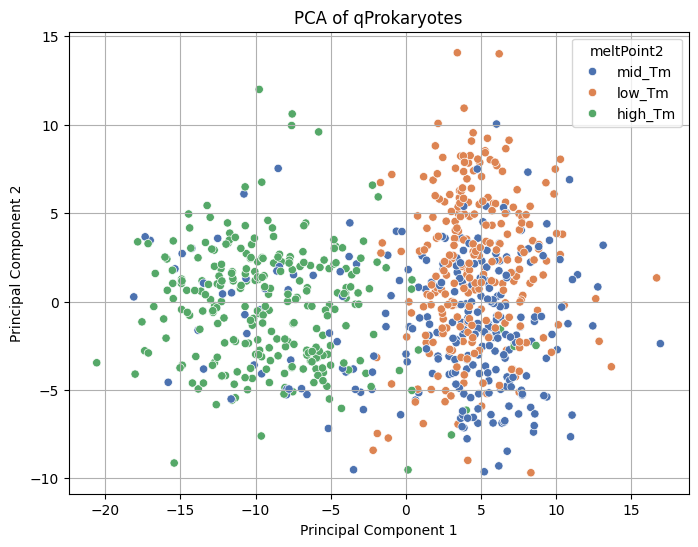

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = qprokaryotes_PCA_df[qprokaryotes_PCA_df['meltPoint2'].isin(['high_Tm','mid_Tm','low_Tm'])], x = 'PC1', y = 'PC2', hue = 'meltPoint2',palette = 'deep')
#sns.scatterplot(data = prokaryotes_PCA_df, x = 'PC1', y = 'PC3', hue = 'meltPoint',palette = 'deep')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of qProkaryotes')
plt.grid()
plt.show()

In [34]:
print(sum(qvariance[0:10]))

0.47720371814984


Regression with multiple models

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#Data preprocessing including meltPoint
while os.path.basename(os.getcwd()) != 'topic04_02':
    os.chdir('..')
    print(os.getcwd())
rprokaryotes = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))
droplist = [0,1,2,3,4,5,6,7,8,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,38,43]
col = rprokaryotes.columns
dropl2 = []
""" for n in col:
    if len(n) == 2:
        dropl2.append(n) """
rprokaryotes = rprokaryotes.drop(rprokaryotes.columns[droplist], axis=1)
rprokaryotes = rprokaryotes.drop(dropl2, axis=1)
rprokaryotes['saltperaa'] = rprokaryotes['A_Salty'] / rprokaryotes['Length']
rprokaryotes = rprokaryotes.drop(['helixind','helixseq'],axis = 1)
rprokaryotes = rprokaryotes.reset_index(drop=True)

C:\Users\tobia\AppData\Local\Temp\ipykernel_4656\4032217112.py:5: DtypeWarning: Columns (8,21,22,23,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  rprokaryotes = pd.read_csv(os.path.join(path, "prokaryotes_323columns.csv"))


In [37]:
X = rprokaryotes.drop('meltPoint', axis=1)  # X is feature matrix
y = rprokaryotes['meltPoint']               # y is target variable
X_train, X_test, y_train, y_test = train_test_split(prokaryotes_PCA, y, test_size=0.2, random_state=41)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}
from sklearn.metrics import mean_squared_error, r2_score

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R²': r2}

# Print the results
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']:.2f}, R²: {metrics['R²']:.2f}")


Linear Regression - MSE: 111.34, R²: 0.54
Ridge Regression - MSE: 111.34, R²: 0.54
Lasso Regression - MSE: 115.50, R²: 0.52
Random Forest - MSE: 65.41, R²: 0.73
Gradient Boosting - MSE: 65.29, R²: 0.73


In [38]:
""" #code takes 9 minutes to run, result: Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
from sklearn.model_selection import GridSearchCV

# Example with Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_) """

' #code takes 9 minutes to run, result: Best parameters found:  {\'max_depth\': 20, \'max_features\': \'sqrt\', \'n_estimators\': 300}\nfrom sklearn.model_selection import GridSearchCV\n\n# Example with Random Forest\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'max_depth\': [10, 20, 30]\n}\n\ngrid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring=\'neg_mean_squared_error\')\ngrid_search.fit(X_train, y_train)\n\n# Best parameters\nprint("Best parameters found: ", grid_search.best_params_) '

In [39]:
# RANDOM FOREST SUPERIOR TO LINEAR REGRESSION, RIDGE, LASSO, GRADIENT BOOSTING
Forest = RandomForestRegressor(max_depth = 20,max_features = 'sqrt',n_estimators = 300,random_state = 42).fit(X_train, y_train)

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
Gradient = GradientBoostingRegressor().fit(X_train, y_train)

In [41]:
test = X_test[105,:]
testpred = Forest.predict([test])
print(testpred)

testpredgradient = Gradient.predict([test])
print(testpredgradient)

[52.03470516]
[45.33077466]


In [42]:
#mean of 2 models
y_predtree = Forest.predict(X_test)
y_predgradient = Gradient.predict(X_test)
y_mean = (y_predtree + y_predgradient) / 2
msemean = mean_squared_error(y_test, y_mean)
print(msemean)
r2mean = r2_score(y_test, y_mean)
print(r2mean)

69.81073023045272
0.7125020391844967


In [43]:
#compare for high mp
highmpx = X_test[np.where(y_test.astype(float)>80)]
highmpy = y_test[y_test.astype(float)>80].astype(float)
yforest = Forest.predict(highmpx)
ygradient = Gradient.predict(highmpx)
print(mean_squared_error(highmpy, yforest))
print(mean_squared_error(highmpy, ygradient))

248.25558735556152
94.70303372677833


In [44]:
import numpy
numpy.version.version


'1.26.4'

In [45]:
sparctest = 'ARVCNMPREQDERVRCYNMKLPRWQASDPOILLINCVRTQWTILLPCVFGDQVY'

In [46]:
def fasparse(faspath):
    helixl = []
    sheetl = []
    data = np.loadtxt(faspath, dtype={'names': ('index', 'col1', 'col2', 'val1', 'val2', 'val3'),'formats': ('i4', 'S1', 'S1', 'f4', 'f4', 'f4')})
    indiceshelix = data['index'][data['col2'] == b'H']
    indicessheet = data['index'][data['col2'] == b'E']
    helix = np.split(indiceshelix, np.where(np.diff(indiceshelix) != 1)[0]+1)
    sheet = np.split(indicessheet, np.where(np.diff(indicessheet) != 1)[0]+1)
    return [helix, sheet]

In [47]:
# SPARC: "Sequence-based Protein Attribute-deRived Melt Point Calculator"
def SPARC(data:str, name, datapath, directoryS4):
    """
    data: string, protein sequence
    name: arbitrary name for the protein
    datapath: string, path to data directory, only "/" allowed
    directoryS4: string, compltete path to directory of S4pred, only "/" allowed
    """
    import numpy as np
    import pandas as pd
    import os
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    features = pd.Series(np.zeros(295))
    features.index = rprokaryotes.drop(columns='meltPoint').columns
    with open(os.path.join(datapath,f'{name}.fasta'), "w") as fasta_file:
        fasta_file.write(f">{name}\n{data}\n")
    os.chdir(directoryS4)
    fastapath = os.path.join(datapath,f'{name}.fasta')
    faspath = os.path.join(datapath,f'{name}.fas')
    os.system(f'python3 run_model.py "{fastapath}" > "{faspath}"')
    Protlen = len(data)
    features.iloc[0] = Protlen
    HelixSparc = fasparse(faspath)[0]
    SheetSparc = fasparse(faspath)[1]
    features.iloc[[1,3]] = len(HelixSparc)
    features.iloc[[2,4]] = len(SheetSparc)
    helixind = np.concatenate(HelixSparc)
    helixseq = np.array(list(data))[list(helixind)]
    sheetind = np.concatenate(SheetSparc)
    features.iloc[[5,7]] = len(helixind) / Protlen
    features.iloc[[6,8]] = len(sheetind) / Protlen
    features.iloc[[9,11]] = np.mean(np.array([len(arr) for arr in HelixSparc]))
    features.iloc[[10,12]] = np.mean(np.array([len(arr) for arr in SheetSparc]))
    features.iloc[[13,14]] = features.iloc[7] + features.iloc[8]
    aapairs = features.index[15:94]
    for aa in aapairs:
        features[aa] = (data.count(aa[0]) + data.count(aa[1])) / Protlen
    for acid in ['A', 'V', 'I', 'L', 'M', 'F', 'W','N', 'Q', 'S', 'T', 'Y','D', 'E','R', 'H', 'K', 'C', 'P', 'G' ]:
        features[f'{acid}helix'] = helixseq.tolist().count(acid) / len(helixseq)
        features[acid] = data.count(acid) / Protlen
    motifs = [motif[:2] for motif in np.array(features.iloc[134:270].index)]
    for motif in motifs:
        features[f'{motif}motif'] = data.count(motif) / Protlen
    features['EALRmotif'] = data.count('EALR') / Protlen
    features['LEALmotif'] = data.count('LEAL') / Protlen
    features['HydrophobicAA'] = features['A'] + features['V'] + features['I'] + features['L'] + features['M'] + features['F'] + features['W']
    features['ChargedAA'] = features['R'] + features['H'] + features['K'] + features['D'] + features['E']
    features['PolarAA'] = features['N'] + features['Q'] + features['S'] + features['T'] + features['Y']
    return features

In [48]:
O = SPARC(sparctest,'sparctest',r'C:/Users/tobia/OneDrive/Documents/Uni/FS 4/Bioinfo Projekt/topic04_02/data/fastas',r'C:/Users/tobia/OneDrive/Documents/Uni/FS 4/Bioinfo Projekt/topic04_02/data/s4pred')

TO DO: Marik functions

In [49]:
features2 = pd.Series(np.zeros(295))
features2.index = rprokaryotes.drop(columns='meltPoint').columns
features2.iloc[[1,3]] = 1